In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [12]:
coluse = list(range(1, 16)) + [36] +[68] #just getting wt% and spot name ('comment')
al6 = pd.read_csv('../data/quanti/Alps6_CAIs_Zrquanti_050225_merged.txt', skiprows=110, usecols=coluse, delimiter="\\t", engine='python', index_col='Comment')
al9 = pd.read_csv('../data/quanti/Alps9_CAIs_Zrquanti_050225_merged.txt', skiprows=110, usecols=coluse, delimiter="\\t", engine='python', index_col='Comment')
le2 = pd.read_csv('../data/quanti/Leops2B_CAIs_Zrquanti_060225_merged.txt', skiprows=110, usecols=coluse, delimiter="\\t", engine='python', index_col='Comment')
vi1 = pd.read_csv('../data/quanti/Vigps1B_CAIs_Zrquanti_060225_merged.txt', skiprows=106, delimiter="\\t", usecols=coluse, engine='python', index_col='Comment')
vi2 = pd.read_csv('../data/quanti/Vigps2B_CAIs_Zrquanti_060225_merged.txt', skiprows=110, delimiter="\\t", usecols=coluse, engine='python', index_col='Comment')

In [13]:
# List of dataframes to process
dfs = ['al6', 'al9', 'le2', 'vi1', 'vi2']

# List of elements and their corresponding detection limits
elements = ['Y ', 'Zr', 'Nb', 'Hf', 'Ta', 'ZrO2']
names    = ['Y', 'Zr', 'Nb', 'Hf', 'Ta', 'ZrO2']
dls = [0.006, 0.015, 0.016, 0.025, 0.029]  # Detection limits in wt%

# Initialize an empty dataframe to store primary data
df_primary = pd.DataFrame()

# Loop through each element and its detection limit
for ele, dl, name in zip(elements, dls, names):
    # Initialize a list to store indices of rows where the element is above the detection limit
    locals()[name+'_present'] = []
    
    # Loop through each dataframe in the list
    for df in dfs:
        # Access the dataframe using its name
        d = locals()[df]
        
        # Find indices where the element's value is above the detection limit
        indicies = d[ele][d[ele] >= dl].index
        
        # Append rows with values above the detection limit to the primary dataframe
        df_primary = pd.concat([df_primary, d[d[ele] >= dl]])
        
        # Append the indices to the corresponding list
        locals()[name+'_present'] = np.append(locals()[name+'_present'], indicies)
    
    # Print the number of rows above the detection limit and their indices
    print(name + ', above DL: ' + str(len(locals()[name+'_present'])))
    print(locals()[name+'_present'])


Y, above DL: 12
['Alps9_c6_4' 'Alps9_c6_6' 'Alps9_c6_12' 'Alps9_c6_13' 'Alps9_c6_14'
 'Alps9_c6_15' 'Alps9_c6_16' 'Alps9_c6_17' 'Alps9_c6_22' 'Alps9_c6_23'
 'Vigps2B_c3_2' 'Vigps2B_c3_5']
Zr, above DL: 67
['Alps6_c33_3' 'Alps6_c33_5' 'Alps6_c33_9' 'Alps6_c34_2' 'Alps6_c34_4'
 'Alps6_c38_6' 'Alps6_c43_1' 'Alps6_c43_4' 'Alps9_c3_1' 'Alps9_c3_3'
 'Alps9_c3_4' 'Alps9_c3_5' 'Alps9_c19_1' 'Alps9_c6_2' 'Alps9_c6_3'
 'Alps9_c6_4' 'Alps9_c6_5' 'Alps9_c6_6' 'Alps9_c6_7' 'Alps9_c6_8'
 'Alps9_c6_9' 'Alps9_c6_10' 'Alps9_c6_11' 'Alps9_c6_12' 'Alps9_c6_13'
 'Alps9_c6_14' 'Alps9_c6_15' 'Alps9_c6_16' 'Alps9_c6_17' 'Alps9_c6_18'
 'Alps9_c6_19' 'Alps9_c6_20' 'Alps9_c6_21' 'Alps9_c6_22' 'Alps9_c6_23'
 'Alps9_c6_24' 'Leops2B_c11_1' 'Vigps2B_c1_1' 'Vigps2B_c1_2'
 'Vigps2B_c1_3' 'Vigps2B_c1_4' 'Vigps2B_c1_5' 'Vigps2B_c1_6'
 'Vigps2B_c1_7' 'Vigps2B_c1_8' 'Vigps2B_c1_10' 'Vigps2B_c1_11'
 'Vigps2B_c3_1' 'Vigps2B_c3_2' 'Vigps2B_c3_3' 'Vigps2B_c3_4'
 'Vigps2B_c3_5' 'Vigps2B_c3_6' 'Vigps2B_c3_7' 'Vigps2B_c3_8'
 'V

notes:
- Y above DL (2): Alps9_c6, Vigps2B_c3
- Zr above DL (11): Alps6_c33, Alps6_c34, Alps6_c38, Alps6_c43, Alps9_c3, Alps9_c19, Alps9_c6, Leops2B_c11, Vigps2B_c1, Vigps2B_c3, Vigps2B_c4
- Nb above DL (4): Alps9_c6, Vig2B_c1, Vig2B_c3, Vig2B_c4

**But overall WAY lower abundances than reported in Jangmi's papers which range from about 8 wt% Zr to >50 wt% Zr**

In [8]:
names    = ['Y', 'Zr', 'Nb', 'Hf', 'Ta']
dls = [0.006, 0.015, 0.016, 0.025, 0.029]

pd.set_option("display.max_rows", None)
#df_primary[['Y ', 'Zr', 'Nb', 'Hf', 'Ta', 'Al']]

In [14]:
goodzr = df_primary[df_primary.Zr >= 0.015]
goodzr[['Y ', 'Zr', 'ZrO2', 'Nb', 'Hf', 'Ta', 'Al']].sort_values(by='Zr', ascending=False)#.head()

,Y,Zr,ZrO2,Nb,Hf,Ta,Al
Comment,,,,,,,
Alps9_c6_14,0.11,0.26,0.35,0.04,0.00,0.01,0.20
Alps9_c6_14,0.11,0.26,0.35,0.04,0.00,0.01,0.20
Alps9_c6_14,0.11,0.26,0.35,0.04,0.00,0.01,0.20
Alps9_c6_12,0.12,0.23,0.31,0.08,0.00,0.00,0.62
Alps9_c6_12,0.12,0.23,0.31,0.08,0.00,0.00,0.62
Alps9_c6_12,0.12,0.23,0.31,0.08,0.00,0.00,0.62
Alps9_c6_6,0.06,0.19,0.26,0.06,0.00,0.00,0.56
Alps9_c6_6,0.06,0.19,0.26,0.06,0.00,0.00,0.56
Alps9_c6_6,0.06,0.19,0.26,0.06,0.00,0.00,0.56


In [15]:
goodzr

,Ti,Ni,Y,Zr,Nb,Ru,La,Ce,Hf,Ta,O,Al,Si,Ca,Fe,ZrO2
Comment,,,,,,,,,,,,,,,,
Alps9_c6_4,15.24,0.01,0.01,0.14,0.04,0.00,0.0,0.10,0.00,0.00,28.91,4.80,2.43,28.89,0.22,0.19
Alps9_c6_6,22.06,0.00,0.06,0.19,0.06,0.00,0.0,0.16,0.00,0.00,27.41,0.56,0.25,29.36,0.12,0.26
Alps9_c6_12,25.66,0.00,0.12,0.23,0.08,0.00,0.0,0.20,0.00,0.00,29.95,0.62,0.61,28.27,0.32,0.31
Alps9_c6_13,14.25,0.01,0.02,0.11,0.05,0.00,0.0,0.13,0.00,0.00,26.99,3.83,2.95,26.07,0.68,0.15
Alps9_c6_14,26.45,0.01,0.11,0.26,0.04,0.00,0.0,0.21,0.00,0.01,29.62,0.20,0.09,28.59,0.30,0.35
Alps9_c6_15,21.86,0.01,0.07,0.18,0.06,0.00,0.0,0.18,0.00,0.00,26.92,0.43,0.33,28.37,0.31,0.25
Alps9_c6_16,19.44,0.01,0.05,0.18,0.06,0.00,0.0,0.14,0.00,0.00,29.91,4.16,2.63,24.23,1.45,0.25
Alps9_c6_17,18.44,0.00,0.04,0.17,0.07,0.00,0.0,0.15,0.00,0.00,26.32,1.81,0.93,27.69,0.56,0.23
Alps9_c6_22,13.28,0.05,0.02,0.13,0.04,0.00,0.0,0.09,0.00,0.00,28.98,4.94,4.70,24.86,1.17,0.18


In [16]:
df_primary

,Ti,Ni,Y,Zr,Nb,Ru,La,Ce,Hf,Ta,O,Al,Si,Ca,Fe,ZrO2
Comment,,,,,,,,,,,,,,,,
Alps9_c6_4,15.24,0.01,0.01,0.14,0.04,0.00,0.0,0.10,0.00,0.00,28.91,4.80,2.43,28.89,0.22,0.19
Alps9_c6_6,22.06,0.00,0.06,0.19,0.06,0.00,0.0,0.16,0.00,0.00,27.41,0.56,0.25,29.36,0.12,0.26
Alps9_c6_12,25.66,0.00,0.12,0.23,0.08,0.00,0.0,0.20,0.00,0.00,29.95,0.62,0.61,28.27,0.32,0.31
Alps9_c6_13,14.25,0.01,0.02,0.11,0.05,0.00,0.0,0.13,0.00,0.00,26.99,3.83,2.95,26.07,0.68,0.15
Alps9_c6_14,26.45,0.01,0.11,0.26,0.04,0.00,0.0,0.21,0.00,0.01,29.62,0.20,0.09,28.59,0.30,0.35
Alps9_c6_15,21.86,0.01,0.07,0.18,0.06,0.00,0.0,0.18,0.00,0.00,26.92,0.43,0.33,28.37,0.31,0.25
Alps9_c6_16,19.44,0.01,0.05,0.18,0.06,0.00,0.0,0.14,0.00,0.00,29.91,4.16,2.63,24.23,1.45,0.25
Alps9_c6_17,18.44,0.00,0.04,0.17,0.07,0.00,0.0,0.15,0.00,0.00,26.32,1.81,0.93,27.69,0.56,0.23
Alps9_c6_22,13.28,0.05,0.02,0.13,0.04,0.00,0.0,0.09,0.00,0.00,28.98,4.94,4.70,24.86,1.17,0.18


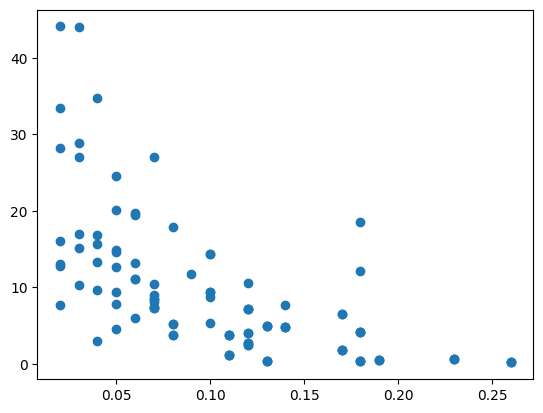

In [14]:
plt.scatter(goodzr['Zr'], goodzr['Al'])

In [43]:
coluse = list(range(1, 16)) + [68]
pd.read_csv('../data/quanti/Vigps1B_CAIs_Zrquanti_060225_merged.txt', skiprows=106, delimiter="\\t", usecols=coluse, engine='python', index_col='Comment')


,Ti,Ni,Y,Zr,Nb,Ru,La,Ce,Hf,Ta,O,Al,Ca,Fe,Si
Comment,,,,,,,,,,,,,,,
Vigps1B_c2_1,6.02,0.02,0.0,0.01,0.0,0.0,0.0,0.03,0.0,0.0,20.92,11.45,15.73,1.45,NaN
Vigps1B_c2_2,6.26,0.03,0.0,0.01,0.0,0.0,0.0,0.03,0.0,0.0,22.00,12.53,15.69,1.39,NaN
Vigps1B_c2_3,4.66,0.03,0.0,0.00,0.0,0.0,0.0,0.03,0.0,0.0,20.62,12.16,16.10,0.86,NaN
Vigps1B_c2_4,4.28,0.03,0.0,0.00,0.0,0.0,0.0,0.02,0.0,0.0,18.69,10.37,16.05,0.66,NaN
Vigps1B_c2_5,5.44,0.02,0.0,0.00,0.0,0.0,0.0,0.02,0.0,0.0,19.78,11.54,14.39,0.46,NaN
Vigps1B_c2_6,3.80,0.04,0.0,0.01,0.0,0.0,0.0,0.02,0.0,0.0,20.17,11.66,17.05,1.55,NaN
Vigps1B_c2_7,3.00,0.03,0.0,0.00,0.0,0.0,0.0,0.01,0.0,0.0,26.63,15.33,27.36,0.19,NaN
Vigps1B_c2_8,4.76,0.01,0.0,0.00,0.0,0.0,0.0,0.03,0.0,0.0,19.53,10.48,17.47,0.15,NaN
Vigps1B_c2_9,0.01,0.00,0.0,0.01,0.0,0.0,0.0,0.00,0.0,0.0,22.67,12.80,28.01,0.32,NaN
